DATA PROCESSING


In [1]:
# Dependancy setup
import os
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from docx import Document

In [ ]:
# Specify the folder path
folder_path = ' '

# List all word documents in the folder, excluding temporary files
word_docs = [file for file in os.listdir(folder_path) if file.endswith('.docx') and not file.startswith('~$')]
word_docs_copy = word_docs.copy()

In [5]:
# Define functions

def read_documents(folder_path, word_docs):
    """
    Read Word documents from the specified folder.

    Parameters:
    folder_path (str): The path to the folder containing the documents.
    word_docs (list): List of Word document filenames.

    Returns:
    list: A list of tuples, each containing the filename and the document object.
    """
    docs = []
    for doc_file in word_docs:
        doc_path = os.path.join(folder_path, doc_file)
        doc = Document(doc_path)
        docs.append((doc_file, doc))
    return docs

def print_document_content(docs):
    """
    Print the content of each Word document.

    Parameters:
    docs (list): A list of tuples, each containing the filename and the document object.
    """
    for doc_file, doc in docs:
        print(f'{doc_file}:')
        for para in doc.paragraphs:
            print(para.text)
        print('\n' + '-'*40 + '\n')

def count_words_in_doc(doc):
    """
    Count the number of words in a Word document.

    Parameters:
    doc (Document): The document object.

    Returns:
    int: The word count.
    """
    return sum(len(para.text.split()) for para in doc.paragraphs)

def compute_word_stats(word_counts):
    """
    Compute the median and mean word counts.

    Parameters:
    word_counts (list): A list of word counts.

    Returns:
    tuple: The median and mean word counts.
    """
    median_word_count = np.median(word_counts)
    mean_word_count = round(np.mean(word_counts), 1)
    return median_word_count, mean_word_count

def plot_word_count_distribution(word_counts, median_word_count, mean_word_count):
    """
    Plot the distribution of word counts with median and mean indicators.

    Parameters:
    word_counts (list): A list of word counts.
    median_word_count (float): The median word count.
    mean_word_count (float): The mean word count.
    """
    plt.figure(figsize=(8, 4))
    sns.histplot(word_counts, bins=10, kde=True, edgecolor='skyblue')
    plt.axvline(median_word_count, color='r', linestyle='--', label=f'Median: {median_word_count}')
    plt.axvline(mean_word_count, color='g', linestyle='-', label=f'Mean: {mean_word_count}')
    plt.title('Word Count Distribution for Playbooks')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.legend(loc='upper left')
    plt.show()

def plot_word_distribution_box(word_counts):
    """
    Plot a box plot of the words distribution.

    Parameters:
    word_counts (list): A list of words counts.
    """
    plt.figure(figsize=(10, 6))
    plt.boxplot(word_counts, vert=False, patch_artist=True)
    plt.title('Word Distribution in Incident Response Playbooks')
    plt.ylabel('Incident Response Playbooks')
    plt.xlabel('Word Count')
    plt.grid(True)
    plt.show()

def process_filenames(word_docs):
    """
    Process filenames to remove specific patterns and normalize them.

    Parameters:
    word_docs (list): List of Word document filenames.

    Returns:
    list: A list of processed filenames.
    """
    return [re.sub(r'playbook|\d+|\.docx', '', file, flags=re.IGNORECASE).replace('_', ' ').strip() for file in word_docs]

def plot_pie_chart(labels, sizes):
    """
    Plot a pie chart of the dataset structure.

    Parameters:
    labels (list): List of labels for the pie chart.
    sizes (list): List of sizes corresponding to the labels.
    """
    colors = plt.cm.Paired(range(len(labels)))
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title('Structure of the Dataset')
    plt.show()

def get_wordnet_pos(tag):
    """
    Convert POS tag to a format that WordNetLemmatizer can understand.

    Parameters:
    tag (str): The POS tag.

    Returns:
    str: The corresponding WordNet POS tag.
    """
    return {
        'J': wordnet.ADJ,
        'V': wordnet.VERB,
        'N': wordnet.NOUN,
        'R': wordnet.ADV
    }.get(tag[0], wordnet.NOUN)

def preprocess_text(text):
    """
    Preprocess text by removing special characters, tokenizing, removing stop words, and lemmatizing.

    Parameters:
    text (str): The input text.

    Returns:
    list: A list of processed words.
    """
    text = re.sub(r'[^A-Za-z\s]', '', text)
    words = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and len(word) >= 3]
    pos_tags = pos_tag(words)
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]

def read_and_preprocess_docs(folder_path, docs):
    """
    Read and preprocess the content of Word documents.

    Parameters:
    folder_path (str): The path to the folder containing the documents.
    docs (list): List of Word document filenames.

    Returns:
    list: A list of preprocessed words from all documents.
    """
    all_words = []
    for doc_file in docs:
        doc_path = os.path.join(folder_path, doc_file)
        doc = Document(doc_path)
        for para in doc.paragraphs:
            all_words.extend(preprocess_text(para.text))
    return all_words

def plot_word_frequencies(word_freq, title):
    """
    Plot a bar chart of the top word frequencies.

    Parameters:
    word_freq (dict): Dictionary of word frequencies.
    title (str): Title of the plot.
    """
    top_words = dict(Counter(word_freq).most_common(10))
    plt.figure(figsize=(6, 4))
    plt.barh(top_words.keys(), top_words.values(), color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.gca().invert_yaxis()
    plt.show()

def plot_word_cloud(word_freq, title):
    """
    Plot a word cloud from word frequencies.

    Parameters:
    word_freq (dict): Dictionary of word frequencies.
    title (str): Title of the plot.
    """
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [ ]:
# Read documents from the folder
docs = read_documents(folder_path, word_docs)


In [17]:
# Count words in each document
word_counts = [count_words_in_doc(doc) for _, doc in docs]

# Sort documents by word count
sorted_docs = sorted(zip(word_docs, word_counts), key=lambda x: x[1], reverse=True)
sorted_word_docs, sorted_word_counts = zip(*sorted_docs)

# Compute median and mean word counts
median_word_count, mean_word_count = compute_word_stats(word_counts)
print(f"Median word count: {median_word_count}")
print(f"Mean word count: {mean_word_count}")

Median word count: 1013.0
Mean word count: 1016.0


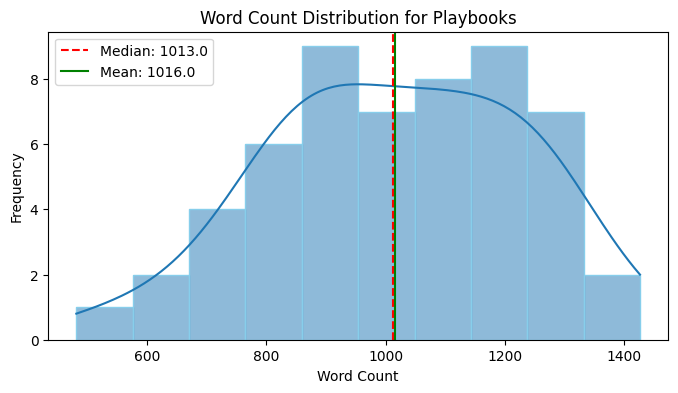

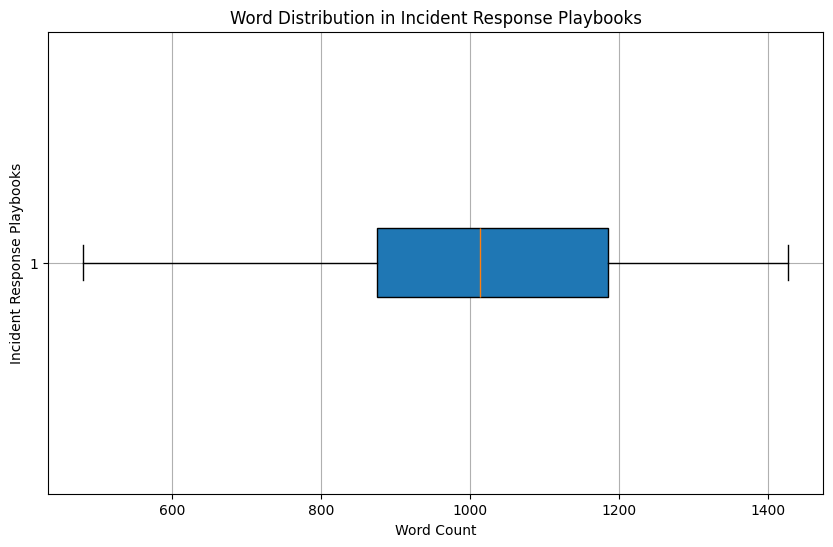

In [19]:
# Plot word count distribution and box plot
plot_word_count_distribution(word_counts, median_word_count, mean_word_count)
plot_word_distribution_box(word_counts)

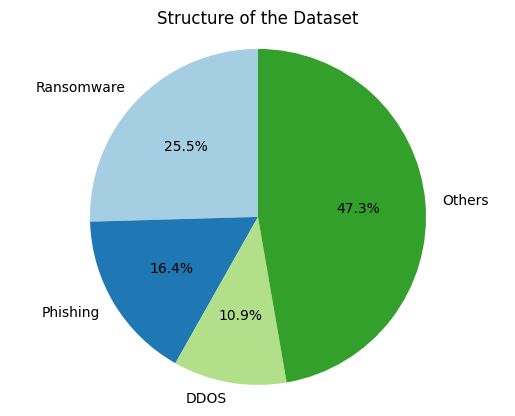

In [27]:
# Process filenames to normalize them
processed_names = process_filenames(word_docs)

# Group and count processed names
grouped_names = Counter(processed_names)
sorted_names = grouped_names.most_common()

# Extract labels and sizes for the top items
top_items = sorted_names[:3]
other_items = sorted_names[3:]

labels = [item[0] for item in top_items]
sizes = [item[1] for item in top_items]
others_count = sum(item[1] for item in other_items)
if others_count > 0:
    labels.append('Others')
    sizes.append(others_count)

plot_pie_chart(labels, sizes)

In [29]:
# Read and preprocess all documents
all_words = read_and_preprocess_docs(folder_path, word_docs)

# Count word frequencies
word_freq = Counter(all_words)
print(word_freq.most_common(10))


[('incident', 957), ('system', 566), ('response', 449), ('attack', 428), ('use', 387), ('security', 369), ('playbook', 353), ('network', 353), ('email', 333), ('ensure', 298)]


In [33]:
# Plot word frequencies and word cloud
#plot_word_frequencies(word_freq, 'Top 10 Word Frequencies (Custom Words Removed)')

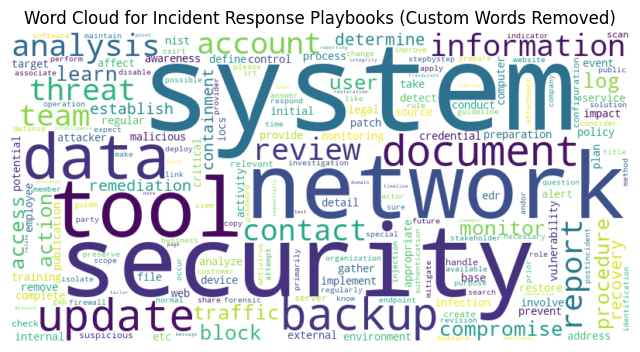

In [37]:
# Define custom stop words and filter them from the word frequencies
custom_stop_words = {'incident', 'response', 'attack', 'playbook', 'step', 'include', 'detection', 'may', 'management', 'communication' , 'malware', 'use', 'application', 'phishing', 'ddos', 'step', 'ensure', 'objective', 'ransomware', 'including', 'identify', 'lesson', 'learned', 'follow', 'email'}
filtered_word_freq = {word: freq for word, freq in word_freq.items() if word not in custom_stop_words}
plot_word_cloud(filtered_word_freq, 'Word Cloud for Incident Response Playbooks (Custom Words Removed)')

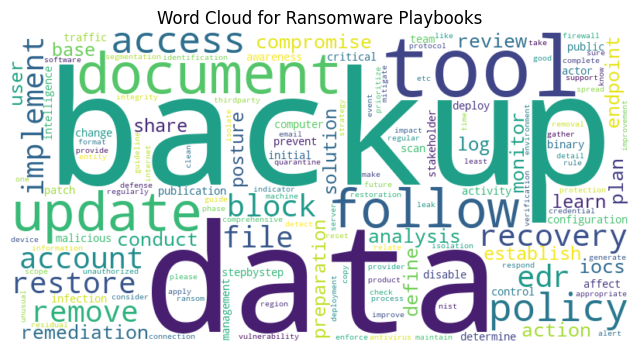

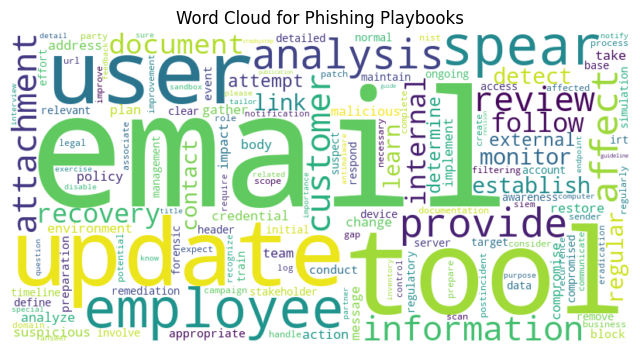

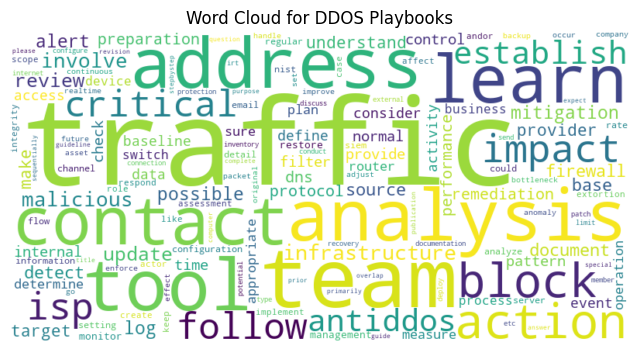

In [45]:
# Process each top category
category_words = {}
for label in labels[:3]:  # Limiting to the top 3 categories
    specific_docs = [file for file, name in zip(word_docs, processed_names) if name == label]
    category_words[label] = read_and_preprocess_docs(folder_path, specific_docs)

# Plot word clouds for each top category
for label, words in category_words.items():
    word_freq = Counter(words)
    custom_stop_words_list = {'incident', 'response', 'playbook', 'attack', 'identify', 'use', 'may', 'procedure', 'training', 'monitoring', 'include', 'detection', 'containment', 'communication', 'threat', 'attacker', 'network', 'report', 'application', 'security', 'step', 'reporting', 'malware', 'service', 'phishing', 'ddos', 'ensure', 'objective', 'ransomware', 'system', 'lesson', 'learned'}
    filtered_word_freq = {word: freq for word, freq in word_freq.items() if word not in custom_stop_words_list}
    limited_word_freq = dict(Counter(filtered_word_freq).most_common(150))
    if len(limited_word_freq) < 10:
        limited_word_freq = dict(Counter(filtered_word_freq).most_common(10))
    plot_word_cloud(limited_word_freq, f'Word Cloud for {label} Playbooks')

In [123]:
# Function to plot horizontal bar graph of word frequencies
def plot_barh_graph(word_freq, title):
    """
    Plot a horizontal bar graph from word frequencies.

    Parameters:
    word_freq (dict): Dictionary of word frequencies.
    title (str): Title of the plot.
    """
    # Sort word frequencies by frequency
    sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))
    words, frequencies = zip(*sorted_word_freq.items())
    plt.figure(figsize=(4, 6))
    plt.barh(words[:20], frequencies[:20], color='blue')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(title)
    plt.gca().invert_yaxis()  # Highest frequency at top
    plt.show()


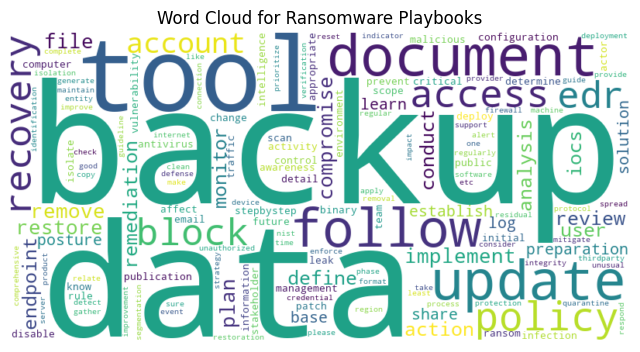

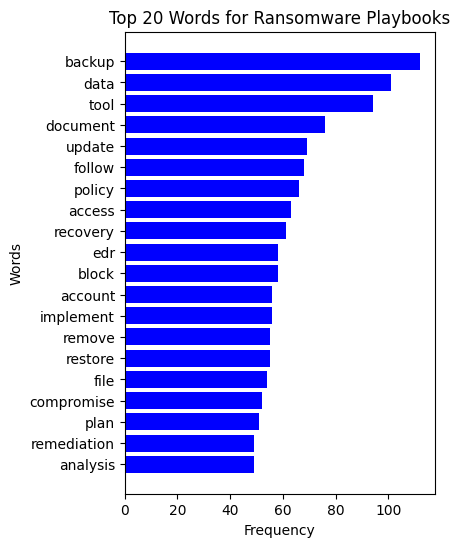

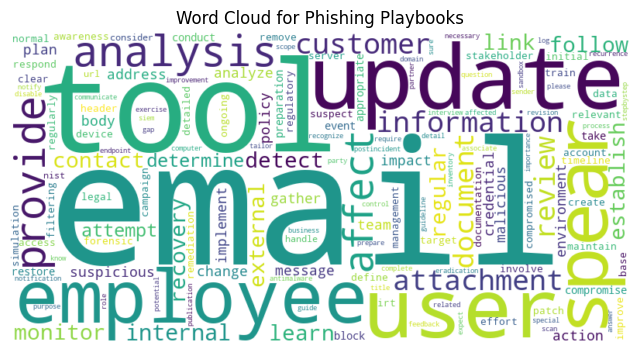

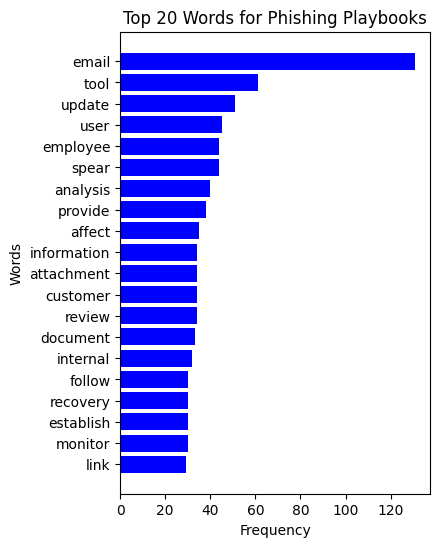

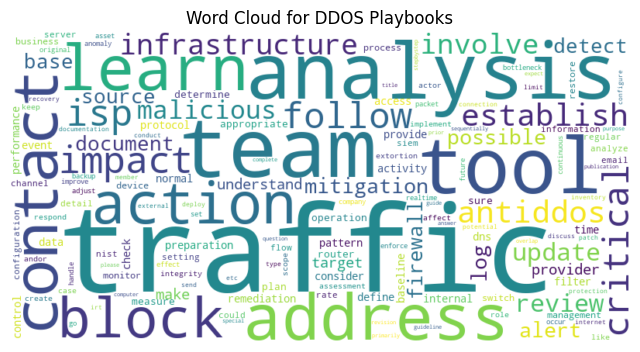

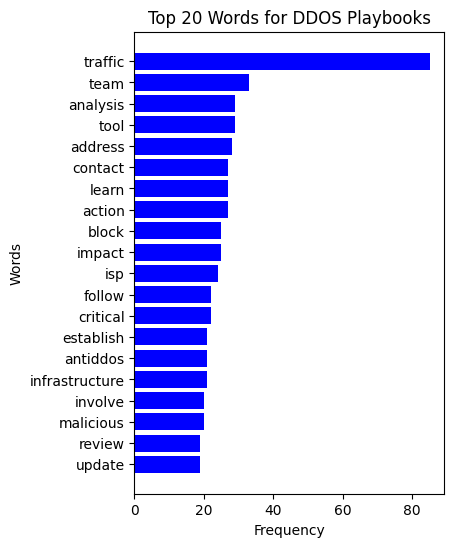

In [125]:
# Plot word clouds and bar graphs for each top category
for label, words in category_words.items():
    word_freq = Counter(words)
    custom_stop_words_list = {'incident', 'response', 'playbook', 'attack', 'identify', 'use', 'may', 'procedure', 'training', 'monitoring', 'include', 'detection', 'containment', 'communication', 'threat', 'attacker', 'network', 'report', 'application', 'security', 'step', 'reporting', 'malware', 'service', 'phishing', 'ddos', 'ensure', 'objective', 'ransomware', 'system', 'lesson', 'learned'}
    filtered_word_freq = {word: freq for word, freq in word_freq.items() if word not in custom_stop_words_list}
    limited_word_freq = dict(Counter(filtered_word_freq).most_common(150))
    if len(limited_word_freq) < 10:
        limited_word_freq = dict(Counter(filtered_word_freq).most_common(10))
    
    plot_word_cloud(limited_word_freq, f'Word Cloud for {label} Playbooks')
    plot_barh_graph(limited_word_freq, f'Top 20 Words for {label} Playbooks')

In [61]:
# Installing dependancies
import os
import re
from docx import Document
from datasets import Dataset, DatasetDict, load_dataset
from sklearn.model_selection import train_test_split

In [ ]:
# Specify the directory containing the playbooks
folder_path = ' '

# Get all .docx files in the directory, excluding temporary or hidden files
doc_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.docx') and not file.startswith('~$')]


In [69]:
# Function to extract text from a Word document while preserving formatting
def extract_text_from_docx(doc_path):
    doc = Document(doc_path)
    content = []
    for para in doc.paragraphs:
        content.append(para.text)
    return "\n".join(content)
    
# Use regex to extract sections and preserve formatting
def extract_sections(text):
    sections = {
        "Question: ": "",
        "Title: ": "",
        "1. Preparation: ": "",
        "2. Detection and Analysis: ": "",
        "3. Containment: ": "",
        "4. Eradication: ": "",
        "5. Recovery: ": "",
        "6. Lessons Learned: ": ""
    }
    
    # Define regex patterns for each section
    patterns = {
        "Question: ": r"Question:(.*?)(?=\n[A-Z])",
        "Title: ": r"Title:(.*?)(?=\n[A-Z])",
        "1. Preparation: ": r"(?<=1. Preparation)(.*?)(?=2. Detection and Analysis)",
        "2. Detection and Analysis: ": r"(?<=2. Detection and Analysis)(.*?)(?=3. Containment)",        
        "3. Containment: ": r"(?<=3. Containment)(.*?)(?=4. Remediation)",
        "4. Eradication: ": r"(?<=4. Remediation)(.*?)(?=5. Recovery)",
        "5. Recovery: ": r"(?<=5. Recovery)(.*?)(?=6. Lessons Learned)",
        "6. Lessons Learned: ": r"(?<=6. Lessons Learned)(.*)"      
    }
    
    # Extract sections using regex and preserve formatting
    for section, pattern in patterns.items():
        match = re.search(pattern, text, re.DOTALL)
        if match:
            sections[section] = match.group(1).strip()
    return sections

In [91]:
# Extract text from all documents
documents = [extract_text_from_docx(path) for path in doc_paths]


# Define the system prompt
stm_prompt = (
    'You are a highly advanced AI assistant in our company responsible for generating detailed incident response playbooks for various types of cyber attacks in OT environment.'
)

B_INST, E_INST = "[INST]", "[/INST]\n"
B_SYS, E_SYS = "<<SYS>>\n", "\n<</SYS>>\n"

# Define the prompt template
prompt_template = f"<s>{B_INST} {B_SYS}{stm_prompt.strip()}{E_SYS}{{}} {E_INST} {{}}</s>\n\n"

# Construct the QA dataset
qa_dataset = []
for doc in documents:
    sections = extract_sections(doc)
    # Ensure all sections are not empty
    if all(sections.values()):
        question = sections["Question: "]
        answer = "Sure. Here is the information requested.\n" + "\n".join([f"{key}: {value}" for key, value in sections.items() if key != "Question: " and value])
        qa_dataset.append({"question": question, "answer": answer})


# Format to QA pairs
def format_qa_pair(qa_pair):
    question = qa_pair['question']
    answer = qa_pair['answer']
    return prompt_template.format(question.strip(), answer.strip())

# Looping
formatted_qa_dataset = [format_qa_pair(qa) for qa in qa_dataset]

# Split the dataset into training and testing sets
train_texts, test_texts = train_test_split(formatted_qa_dataset, test_size=0.1, random_state=42)
train_dataset = Dataset.from_dict({"text": train_texts})
test_dataset = Dataset.from_dict({"text": test_texts})

# Combine into a DatasetDict
dataset_dict = DatasetDict({"train": train_dataset, "test": test_dataset})

In [ ]:
# Save the dataset to disk
dataset_save_path = " "
dataset_dict.save_to_disk(dataset_save_path)